In [36]:
import pandas as pd
import seaborn as sns

In [2]:
# load datasets
train = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/train.csv")
transactions = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/transactions.csv")
test = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/test.csv")
stores = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/stores.csv")
oil = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/oil.csv")
items = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/items.csv")
holidays_events = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/holidays_events.csv")

/Users/tehuttesfayebiru/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
holidays_events = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/favorita-grocery-sales-forecasting/holidays_events.csv")

In [4]:
train = train.sample(10000)
len(train)

10000

In [10]:
transactions= transactions.sample(10000)
stores = stores.sample(1000, replace = True)
oil = oil.sample(10000, replace = True)
items = items.sample(10000, replace = True)
holidays_events = holidays_events.sample(10000, replace = True)

In [3]:
train["store_nbr"].nunique()

54

In [4]:
train["item_nbr"].nunique()

4036

In [6]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

In [8]:
len(train)

125497040

In [7]:
len(train)-train["onpromotion"].isna().sum() # total viable rows

103839389

In [9]:
train.dropna(inplace=True)

In [11]:
train["onpromotion"].value_counts() # distribution is not too skewed

False    96028767
True      7810622
Name: onpromotion, dtype: int64

In [6]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [7]:
transactions.head() # total transactions or unit sales for all items?

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<AxesSubplot:>

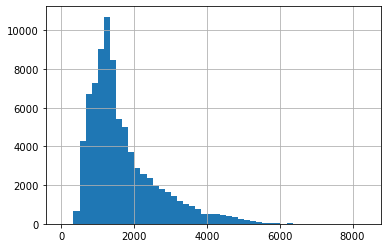

In [12]:
transactions["transactions"].hist(bins=50) # slightly right skewed

In [9]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
stores["state"].value_counts()

Pichincha                         19
Guayas                            11
Manabi                             3
Santo Domingo de los Tsachilas     3
Azuay                              3
El Oro                             2
Tungurahua                         2
Los Rios                           2
Cotopaxi                           2
Chimborazo                         1
Bolivar                            1
Loja                               1
Imbabura                           1
Esmeraldas                         1
Pastaza                            1
Santa Elena                        1
Name: state, dtype: int64

In [16]:
stores["city"].value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Machala           2
Ambato            2
Manta             2
Latacunga         2
Ibarra            1
El Carmen         1
Guaranda          1
Salinas           1
Daule             1
Babahoyo          1
Libertad          1
Loja              1
Riobamba          1
Playas            1
Cayambe           1
Quevedo           1
Puyo              1
Esmeraldas        1
Name: city, dtype: int64

<AxesSubplot:>

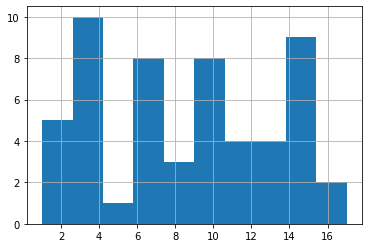

In [18]:
stores["cluster"].hist()

In [20]:
oil.head()

,date,dcoilwtico
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


In [19]:
oil.dropna(inplace=True)

In [25]:
type(oil.iloc[0,0])

str

In [26]:
oil['date']= pd.to_datetime(oil['date'])

<AxesSubplot:xlabel='date'>

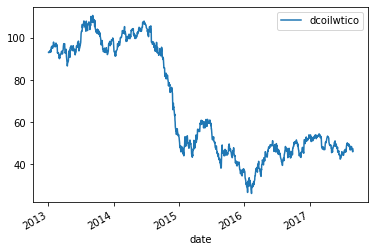

In [29]:
oil.plot(x="date",y="dcoilwtico") # huge downturn in oil prices starting 2015 

In [1]:
items.head()

NameError: name 'items' is not defined

In [31]:
items["family"].value_counts()

GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
LINGERIE                        20
AUTOMOTIVE                      20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
PET SUPPLIES                    14
GROCERY II                      14
SEAFOOD                          8
MAGAZINES           

<AxesSubplot:>

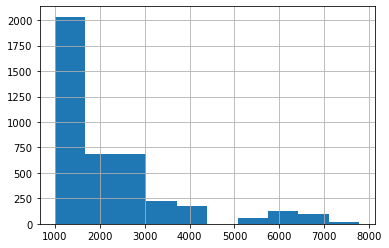

In [33]:
items["class"].hist()

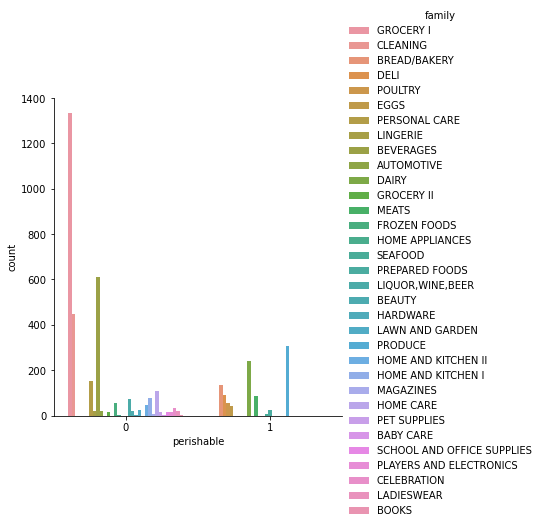

In [37]:
sns.catplot(x='perishable',hue='family',data=items,kind="count")

<AxesSubplot:xlabel='type'>

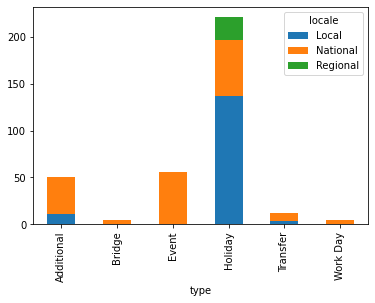

In [61]:
pd.crosstab(holidays_events['type'],holidays_events['locale']).plot.bar(stacked=True)

In [60]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [63]:
holidays_events.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [64]:
holidays_events["description"].nunique()

103

In [65]:
holidays_events["transferred"].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [70]:
holidays_events['date']= pd.to_datetime(holidays_events['date'])

In [72]:
type(holidays_events.iloc[0,5])

str

In [67]:
holidays_events["transferred"] = holidays_events["transferred"].astype(str)

In [68]:
type(holidays_events.iloc[0,5])

str

In [75]:
holidays_events['date'].nunique()

312

In [80]:
holidays_events['year'] = pd.to_datetime(holidays_events['date']).dt.to_period('Y')

In [78]:
holidays_events['month_year'].nunique()

69

<AxesSubplot:xlabel='year'>

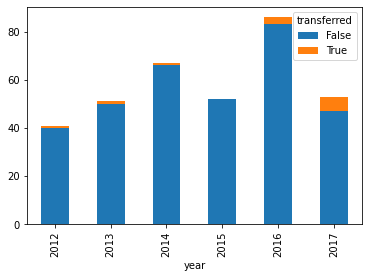

In [81]:
pd.crosstab(holidays_events['year'],holidays_events['transferred']).plot.bar(stacked=True)

In [ ]:
# Join tables
trans_train = pd.merge(
    left=train,
    right=transactions,
    left_on='store_nbr',
    right_on='store_nbr',
    how='left'
)
trans_train

In [ ]:
# Join tables
trans_stores = pd.merge(
    left=trans_train,
    right=stores,
    left_on='store_nbr',
    right_on='store_nbr',
    how='left'
)
trans_stores

In [ ]:
# Join tables
trans_items = pd.merge(
    left=trans_stores,
    right=items,
    left_on='item_nbr',
    right_on='item_nbr',
    how='left'
)
trans_items

In [ ]:
# Join tables
oil_holiday = pd.merge(
    left=oil,
    right=holidays_events,
    left_on='date',
    right_on='date',
    how='left'
)
oil_holiday

In [ ]:
# Join tables
full_merged = pd.merge(
    left=oil_holiday,
    right=trans_items,
    left_on='date',
    right_on='date',
    how='left'
)
full_merged